In [32]:
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [8]:
def checkCompleteCollection(currentCollection, itemCounts):
    for i,j in zip(currentCollection.values(), itemCounts.values()):
        if len(i) < j:
            return False
    else:
        return True

In [28]:
def simulate_helwyr(n = 10000, reputation = 10, tier3luck = True, cm = False):
    fullCollectionCount = np.zeros(n)
    nHelmet = np.zeros(n)
    nBody = np.zeros(n)
    nLegs = np.zeros(n)
    nWand = np.zeros(n)
    nOrb = np.zeros(n)
    nCrest = np.zeros(n)
    
    reputation_denom = {0:512,
                        1:448, 2:448, 3:448,
                        4:384, 5:384, 6:384, 7:384,
                        8:320, 9:320, 10:320,
                        11:256}
    reputation_denom_cm = {0:460,
                           1:380, 2:380, 3:380,
                           4:307, 5:307, 6:307, 7:307,
                           8:240, 9:240, 10:240,
                           11:179}
    reputation_crest_denom = {0:128,
                              1:112, 2:112, 3:112,
                              4:96, 5:96, 6:96, 7:96,
                              8:80, 9:80, 10:80,
                              11:64}
    reputation_crest_denom_cm = {0:115,
                                 1:95, 2:95, 3:95,
                                 4:76, 5:76, 6:76, 7:76,
                                 8:60, 9:60, 10:60,
                                 11:44}
    denom = reputation_denom[reputation]
    denom_crest = reputation_crest_denom[reputation]
    if (cm):
        denom=reputation_denom_cm[reputation]
        denom_crest = reputation_crest_denom_cm[reputation]
    if (tier3luck):
        denom = denom * 0.99
        denom_crest = denom * 0.99
    itemCounts = {"helmet": 1,
                  "body": 1,
                  "legs": 1,
                  "wand": 1,
                  "orb": 1,
                  "crest": 3}
    for x in range(n):
        currentCollection = {"helmet": [],
                     "body": [],
                     "legs": [],
                     "wand": [],
                     "orb": [],
                     "crest": []}
        count = 0
        while not checkCompleteCollection(currentCollection, itemCounts):
            count += 1
            drop = random.rand()
            if (drop <= ((5 * (denom ** -1)) + (denom_crest ** -1))):
                if (drop <= denom ** -1):
                    currentCollection["helmet"].append(count)
                elif (drop > denom **-1) and (drop <= (2 * (denom ** -1))):
                    currentCollection["body"].append(count)
                elif (drop > (2 * (denom ** -1))) and (drop <= (3 * (denom ** -1))):
                    currentCollection["legs"].append(count)
                elif (drop > (3 * (denom ** -1))) and (drop <= (4 * (denom ** -1))):
                    currentCollection["wand"].append(count)
                elif (drop > (4 * (denom ** -1))) and (drop <= (5 * (denom ** -1))):
                    currentCollection["orb"].append(count)
                elif (drop > (5 * (denom ** -1))) and (drop <= ((5 * (denom ** -1)) + (denom_crest ** -1))):
                    currentCollection["crest"].append(count)
        fullCollectionCount[x] = count
        nHelmet[x] = len(currentCollection["helmet"])
        nBody[x] = len(currentCollection["body"])
        nLegs[x] = len(currentCollection["legs"])
        nWand[x] = len(currentCollection["wand"])
        nOrb[x] = len(currentCollection["orb"])
        nCrest[x] = len(currentCollection["crest"])
    sim_helwyr = {"fullCollectionCount" : fullCollectionCount,
                  "nHelmet" : nHelmet,
                  "nBody" : nBody,
                  "nLegs" : nLegs,
                  "nWand" : nWand,
                  "nOrb" : nOrb,
                  "nCrest" : nCrest}
    return sim_helwyr

In [50]:
n = 1000
sim_5000 = simulate_helwyr(n = 1000)

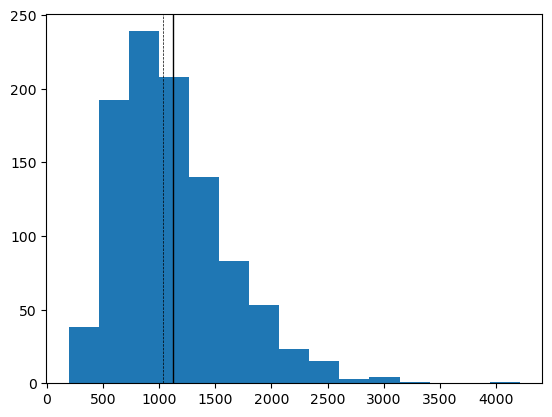

Out of 1000 samples, the smallest number of completions needed for a full collection log was 198.0
Looking at the bigger picture, the average number of completions needed for a full collection log was 1122.249 ,whereas the median number of completions was 1036.0
94.0 % of individuals completed their collection log within 2,000 completions, but an unlucky 6.0 % continued beyond 2,000 completions


In [52]:
fullCollectionCount = np.array(sim_5000["fullCollectionCount"])
plt.hist(fullCollectionCount, bins = 15)
plt.axvline(fullCollectionCount.mean(), color='k', linewidth=1)
plt.axvline(np.median(fullCollectionCount), color='k', linestyle='dashed', linewidth=0.5)
plt.show()
print("Out of", n, "samples, the smallest number of completions needed for a full collection log was",np.min(fullCollectionCount))
print("Looking at the bigger picture, the average number of completions needed for a full collection log was", np.mean(fullCollectionCount),
      ",whereas the median number of completions was", np.median(fullCollectionCount))
print(np.mean(fullCollectionCount <= 2000)*100,"% of individuals completed their collection log within 2,000 completions, but an unlucky",
      np.mean(fullCollectionCount> 2000)*100, "% continued beyond 2,000 completions")